# Explanations visualization moleculized

In [21]:
from rdkit import Chem
from rdkit.Chem import Draw
from pysmiles import read_smiles
import networkx as nx

import numpy as np
from rdkit_heatmaps import mapvalues2mol
from rdkit_heatmaps.utils import transform2png

### Definition and preparation of an exemplary compound.

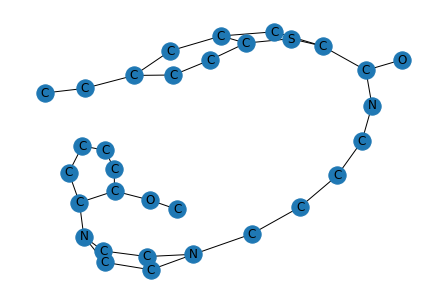

In [22]:
test_cpd_smile = "C#Cc1ccc2sc(C(=O)NCCCCN3CCN(c4ccccc4OC)CC3)cc2c1" #"Cc1ncsc1-c1nnc(SCCCN2CCC3(CC3c3ccc(C(F)(F)F)cc3)C2)n1C"
test_mol = Chem.MolFromSmiles(test_cpd_smile)
test_mol = Draw.PrepareMolForDrawing(test_mol)

pysmile_mol = read_smiles(test_cpd_smile)
labels = nx.get_node_attributes(pysmile_mol, 'element') 
nx.draw(pysmile_mol, labels = labels, pos=nx.spring_layout(pysmile_mol))

In [23]:
num_bonds = len(test_mol.GetBonds())
num_atoms = len(test_mol.GetAtoms())

print atoms in molecule

In [24]:
# for i in range(num_atoms):
#     print("Atom: ", i, " " , test_mol.GetAtomWithIdx(i).GetSymbol())

In [25]:
rdkit_bonds = {}

for i in range(num_bonds):
    init_atom = test_mol.GetBondWithIdx(i).GetBeginAtomIdx()
    end_atom = test_mol.GetBondWithIdx(i).GetEndAtomIdx()
    bond_type = test_mol.GetBondWithIdx(i).GetBondType()
    # print("Bond: ", i, " " , init_atom, "-" , end_atom, " ", bond_type)
    rdkit_bonds[(init_atom, end_atom)] = i
    #CNC(=O)CN1CN(c2ccccc2)C2(CCN(Cc3cc4c(cc3Cl)OCO4)CC2)C1=O
rdkit_bonds

{(0, 1): 0,
 (1, 2): 1,
 (2, 3): 2,
 (3, 4): 3,
 (4, 5): 4,
 (5, 6): 5,
 (6, 7): 6,
 (7, 8): 7,
 (8, 9): 8,
 (8, 10): 9,
 (10, 11): 10,
 (11, 12): 11,
 (12, 13): 12,
 (13, 14): 13,
 (14, 15): 14,
 (15, 16): 15,
 (16, 17): 16,
 (17, 18): 17,
 (18, 19): 18,
 (19, 20): 19,
 (20, 21): 20,
 (21, 22): 21,
 (22, 23): 22,
 (23, 24): 23,
 (24, 25): 24,
 (25, 26): 25,
 (18, 27): 26,
 (27, 28): 27,
 (7, 29): 28,
 (29, 30): 29,
 (30, 31): 30,
 (31, 2): 31,
 (30, 5): 32,
 (28, 15): 33,
 (24, 19): 34}

In [26]:
labels = nx.get_node_attributes(pysmile_mol, 'element') 

Using Shapley values as bond weights

 Specific Shapley values and edge index for the given cpd

In [27]:
phi = [-0.0075400086123468425,
-0.0017900100647231779,
0.00646102065322375,
-0.007153485307777295,
-0.01308701826592846,
-0.012854419611147003,
-0.0014355060518431192,
0.0049548682241168426,
-0.006814161167191513,
-0.004757987087055359,
0.0052637134550929865,
0.022440529337196105,
-0.0012870140825186188,
0.0029028721742497695,
-0.014176115070254607,
0.001151894537771632,
0.014691411317311318,
-0.007589338195872055,
0.009377438309149212,
0.04447151603983156,
-0.014085739864909639,
0.0776316887177767,
0.003772619480478305,
-0.002215537019083119,
-0.09915574753099021,
0.04496525210597659,
-0.029264225885301292,
0.047730068569606765,
0.02275690535358911,
0.043030518761140266,
0.06773346064824405,
0.04341998984389711,
0.14325948277402056,
0.059107648201385504,
0.06146347100220409,
0.004484606926460066,
0.033010203410049684,
-0.007885205832185955,
0.05901925707109409,
0.00953319896495573,
-0.0034952483582825246,
0.010162142188407997,
0.016451144419940875,
0.011963225488286544,
0.011327043036495598,
0.048447627724573235,
8.126761915871472e-05,
0.011901373126128314,
-0.008052821655941633,
0.0101711757747624,
-0.0057141246752710675,
-0.00146816561201035,
0.001916696590531038,
0.0031575863074482257,
-0.0044075220017117086,
-0.010569715816806767,
-0.00207194671019083,
0.04142296108872156,
-0.020578179570904423,
0.003864705004845112,
-0.013902487347763316,
0.025721600938800097,
0.014380304393150134,
0.02672993033670211,
0.006030169860006636,
0.002785786404389947,
-0.008132669753530367,
0.004640471615995224,
0.0973842272371555,
0.050255037303993444,
-0.0039433538049644355,
-0.0002376396111108678,
0.02844448906161625,
0.015294747104267562]

###edge index for C#
# edge_index = [[ 0,  1,  1,  2,  2,  2,  3,  3,  4,  4,  5,  5,  5,  6,  6,  7,  7,  7,
#           8,  8,  8,  9, 10, 10, 11, 11, 12, 12, 13, 13, 14, 14, 15, 15, 15, 16,
#          16, 17, 17, 18, 18, 18, 19, 19, 19, 20, 20, 21, 21, 22, 22, 23, 23, 24,
#          24, 24, 25, 25, 26, 27, 27, 28, 28, 29, 29, 30, 30, 30, 31, 31],
#         [ 1,  0,  2,  1,  3, 31,  2,  4,  3,  5,  4,  6, 30,  5,  7,  6,  8, 29,
#           7,  9, 10,  8,  8, 11, 10, 12, 11, 13, 12, 14, 13, 15, 14, 16, 28, 15,
#          17, 16, 18, 17, 19, 27, 18, 20, 24, 19, 21, 20, 22, 21, 23, 22, 24, 19,
#          23, 25, 24, 26, 25, 18, 28, 15, 27,  7, 30,  5, 29, 31,  2, 30]]
edge_index = [[ 0,  1,  1,  1,  2,  2,  3,  3,  4,  4,  5,  5,  5,  6,  6,  6,  7,  7,
          8,  8,  9,  9,  9, 10, 10, 11, 11, 12, 12, 13, 13, 14, 14, 14, 15, 15,
         16, 16, 17, 17, 17, 17, 18, 18, 19, 19, 19, 20, 20, 20, 21, 21, 22, 22,
         23, 23, 23, 24, 24, 24, 24, 25, 26, 27, 28, 28, 29, 29, 30, 30, 31, 31,
         31, 32],
        [ 1,  0,  2,  5,  1,  3,  2,  4,  3,  5,  1,  4,  6,  5,  7, 31,  6,  8,
          7,  9,  8, 10, 31,  9, 11, 10, 12, 11, 13, 12, 14, 13, 15, 30, 14, 16,
         15, 17, 16, 18, 19, 30, 17, 19, 17, 18, 20, 19, 21, 29, 20, 22, 21, 23,
         22, 24, 28, 23, 25, 26, 27, 24, 24, 24, 23, 29, 20, 28, 14, 17,  6,  9,
         32, 31]]
###edge index for n1c

Get a single Phi values for each edge by summing the Phis of both directions

In [28]:
rdkit_bonds
rdkit_bonds_phi = [0]*num_bonds
for i in range(len(phi)):
    phi_value = phi[i]
    init_atom = edge_index[0][i]
    end_atom = edge_index[1][i]
    
    if (init_atom, end_atom) in rdkit_bonds:
        bond_index = rdkit_bonds[(init_atom, end_atom)]
        rdkit_bonds_phi[bond_index] += phi_value
    if (end_atom, init_atom) in rdkit_bonds:
        bond_index = rdkit_bonds[(end_atom, init_atom)]
        rdkit_bonds_phi[bond_index] += phi_value

# rdkit_bonds_phi

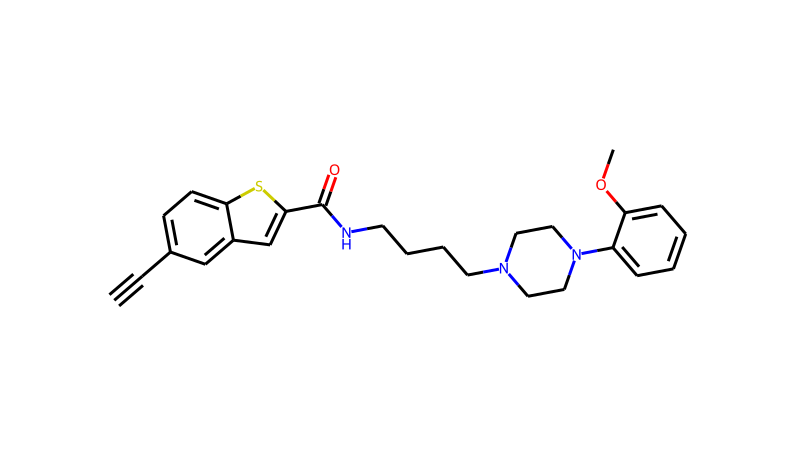

In [29]:
# canvas = mapvalues2mol(test_mol, None, rdkit_bonds_phi, atom_width=0.2, bond_length=0.5, bond_width=0.5) #TBD: only one direction for edges? bonds weights is wrt rdkit bonds order?
canvas = mapvalues2mol(test_mol, None, rdkit_bonds_phi, atom_width=0, bond_length=0, bond_width=0)
img = transform2png(canvas.GetDrawingText())
img.save("molecule_300dpi.png", dpi = (300,300))
img

Colorbar

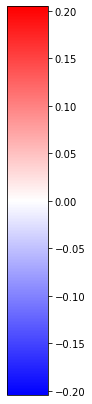

In [30]:
import pylab as pl
import numpy as np
import matplotlib.colors as colors

abs_max = np.max(np.abs(rdkit_bonds_phi))
v_lim = -abs_max, abs_max
normalizer = colors.Normalize(vmin=v_lim[0], vmax=v_lim[1])
norm = normalizer(rdkit_bonds_phi)

a = np.array([[-abs_max,abs_max]])
pl.figure(figsize=(0.7, 9))
img = pl.imshow(a, cmap="bwr")
pl.gca().set_visible(False)
pl.legend("Shapley values magnitude", loc="upper left")
# cax = pl.axes([0.1, 0.2, 0.8, 0.6]) #vertical
cax = pl.axes([0.1, 0.2, 0.8, 0.6]) #horizontal
pl.xticks( [-0.20, 0.20], ["A", "bb"])
pl.colorbar(orientation="vertical", cax=cax)
# pl.savefig("../color_bars/colorbar_edgeshaper_generals", dpi = 300, bbox_inches='tight')

([<matplotlib.axis.YTick at 0x22427d1b040>,
 [Text(1, 0.0, 'Max negative\ncontribution'),
  Text(1, 0.5, 'Null contribution'),
  Text(1, 1.0, 'Max positive\ncontribution')])

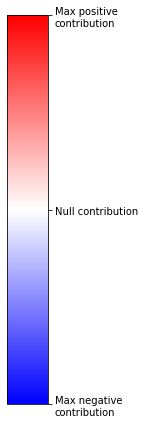

In [31]:
import matplotlib.pyplot as plt
import matplotlib as mpl

fig = plt.figure(figsize=(0.7, 9))
ax = fig.add_axes(([0.1, 0.2, 0.8, 0.6]))


cb = mpl.colorbar.ColorbarBase(ax, orientation='vertical', 
                               cmap='bwr')
plt.yticks([0,0.5, 1],['Max negative\ncontribution', "Null contribution", 'Max positive\ncontribution'])
# plt.savefig('just_colorbar', bbox_inches='tight', dpi=300)